# 1. Introduction 
we use data contain Germany country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017.
- To detemaine and Visualize **Trend** , **seasonality** and **stationary** .
- To forcast totals of electricity consumption in the first Month in 2018 .

# 2. Technology
we use some library  or Packages in python :
- Use `pandas` to deal with data
- Use `seaborn` and `matplotlib` to Visualize data
- Use `statsmodels` to forcast futural data
- Use `numpy` to statistic operation


###### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read data and parse date 
-  use `parse_dates=` as paramter in `read_csv` to parse time

In [2]:
data=pd.read_csv('opsd_germany_daily.csv',parse_dates=['Date'])
data

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


#### Time-based indexing:
using dates and times to intuitively organize and access our data

In [3]:
data.set_index('Date', inplace=True)

In [4]:
data

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [5]:
data.loc['2017-01':'2017-01', 'Consumption']

Date
2017-01-01    1130.413
2017-01-02    1441.052
2017-01-03    1529.990
2017-01-04    1553.083
2017-01-05    1547.238
2017-01-06    1501.795
2017-01-07    1405.145
2017-01-08    1301.011
2017-01-09    1604.348
2017-01-10    1639.046
2017-01-11    1654.809
2017-01-12    1620.597
2017-01-13    1608.895
2017-01-14    1392.736
2017-01-15    1289.904
2017-01-16    1605.465
2017-01-17    1649.104
2017-01-18    1669.395
2017-01-19    1667.477
2017-01-20    1641.737
2017-01-21    1423.020
2017-01-22    1340.341
2017-01-23    1663.492
2017-01-24    1682.002
2017-01-25    1674.171
2017-01-26    1659.527
2017-01-27    1629.164
2017-01-28    1394.033
2017-01-29    1296.170
2017-01-30    1605.356
2017-01-31    1620.860
Name: Consumption, dtype: float64

#### Visualizing time series data
- plot data

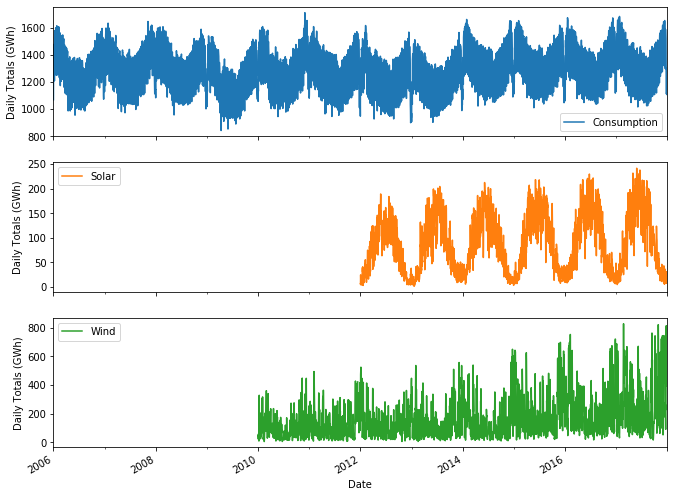

In [6]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = data[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

- using scatter plot

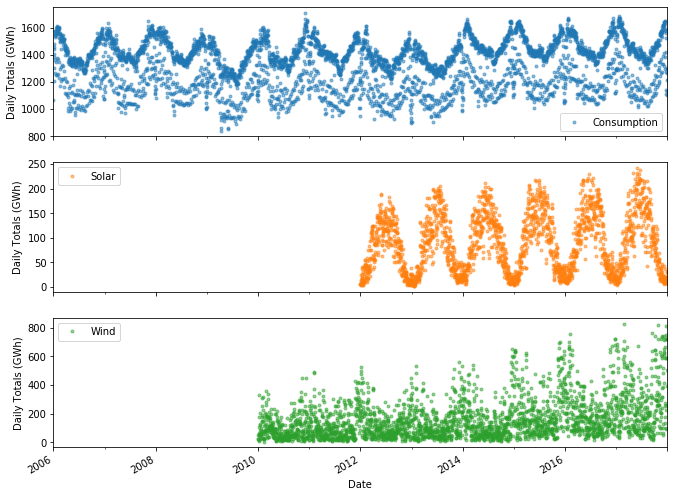

In [7]:
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

### Note :
We can already see some interesting patterns emerge:
- Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.
- There appears to be a strong increasing trend in wind power production over the years.
- data is seasonal time series that is mean has pattern repeats again and again at regular time intervals. 
**Seasonality : is always of a fixed and known period**

In [8]:
data.loc['2017','Consumption']

Date
2017-01-01    1130.41300
2017-01-02    1441.05200
2017-01-03    1529.99000
2017-01-04    1553.08300
2017-01-05    1547.23800
                 ...    
2017-12-27    1263.94091
2017-12-28    1299.86398
2017-12-29    1295.08753
2017-12-30    1215.44897
2017-12-31    1107.11488
Name: Consumption, Length: 365, dtype: float64

- we can  plot the time series in a single year for example 2017

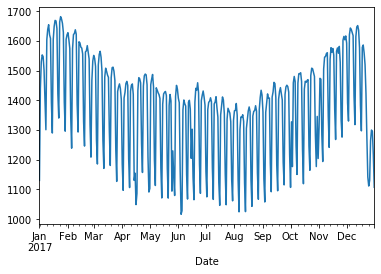

In [9]:
data.loc['2017','Consumption'].plot()

- we can zoom in further and look at just January and February 2017.

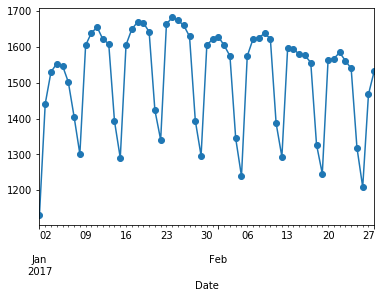

In [10]:
data.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o')

#### Trend:
The linear increasing or decreasing behavior of the series over time
- we can determine **trend** of our data , we use **rolling means** 
- **rolling means**  : tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. 
- let window size= $k$ and $\hat{y}_{t} $ is next day after $k$ days (unit of time) , we can assume that $\hat{y}_{t} = \frac{1}{k} \displaystyle\sum^{k}_{n=1} y_{t-n}$
- for impelemention , we use `DataFrame.rolling(window).mean()`
- We compute 7-day rolling means

In [11]:
rolling_7_day =data['Consumption'].rolling(window=7).mean()
rolling_7_day

Date
2006-01-01            NaN
2006-01-02            NaN
2006-01-03            NaN
2006-01-04            NaN
2006-01-05            NaN
                 ...     
2017-12-27    1266.125593
2017-12-28    1234.624439
2017-12-29    1216.317254
2017-12-30    1208.214129
2017-12-31    1203.265211
Name: Consumption, Length: 4383, dtype: float64

- We compute 365-day rolling means

In [12]:
rolling_365_day =data['Consumption'].rolling(window=365).mean()
rolling_365_day

Date
2006-01-01            NaN
2006-01-02            NaN
2006-01-03            NaN
2006-01-04            NaN
2006-01-05            NaN
                 ...     
2017-12-27    1383.323956
2017-12-28    1383.337608
2017-12-29    1383.335391
2017-12-30    1383.128281
2017-12-31    1382.839368
Name: Consumption, Length: 4383, dtype: float64

- we can plot the 7-day and 365-day rolling mean electricity consumption, along with the daily time series.

Text(0.5, 1.0, 'Trends in Electricity Consumption')

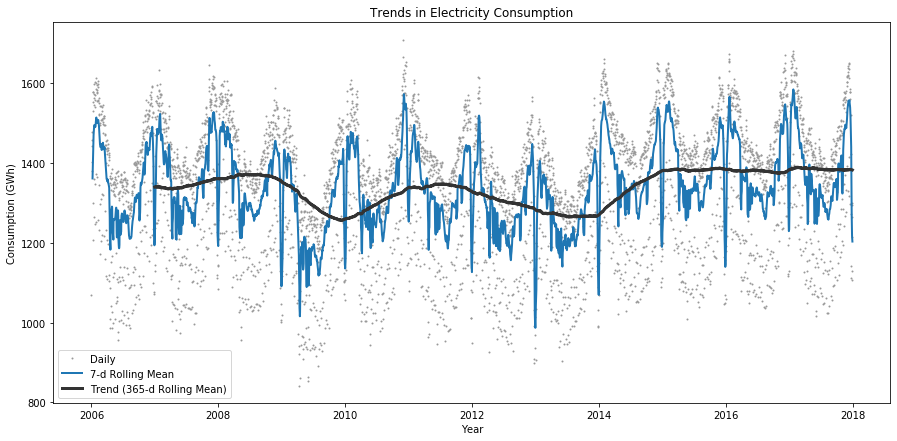

In [13]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(rolling_7_day, linewidth=2, label='7-d Rolling Mean')
ax.plot(rolling_365_day, color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

- we can zoom in further and look at only 2017

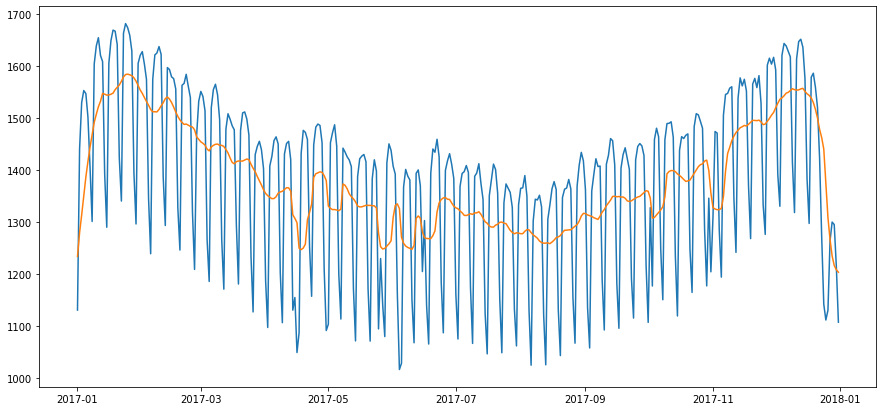

In [14]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(data.loc['2017','Consumption'])
ax.plot(rolling_7_day.loc['2017'])


### Note :
- electricity consumption is typically higher in winter and lower in summer, there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January.
- we can see that the long-term trend in electricity consumption is pretty flat, with a couple of periods of anomalously low consumption around 2009 and 2012-2013.


#### Forcasting in time series 
- Autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step.
- when we use any regression model , we should check **correlation** between variables. we will use **Autoregression** to forcast futural data but we will use **Autocorrelation**


#####  Autocorrelation :  
is Correlation of a time series with a lagged copy of itself (the correlation between the output variable and values at previous time steps at various different lags)
- we know that If both variables change in the same direction (e.g. go up together or down together), this is called a positive correlation. If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called negative correlation.


<Figure size 1080x504 with 0 Axes>

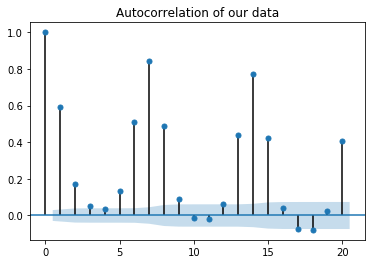

In [15]:
#plot Autocorrelation of our data
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(15, 7))
plot_acf(data['Consumption'], lags=20)
plt.title('Autocorrelation of our data')
plt.show()

### Note :
- The autocorrelation plot for daily electricity consumption shows that most of the spikes are statistically significant. This indicates that the returns are highly correlated
- We can use **Autoregression Model**

##### Autoregression Model
we assume a linear relationship between the value of a variable at time $t$ and the value of the same variable in the past, that is time  $t-1,t-2,...,t-p,...,2,1,0$

$\hat{y} = {\beta}_{1}y_{t-1} + {\beta}_{2}y_{t-2} +...+ {\beta}_{p}y_{t-p}+ {\epsilon}_{t} $
Here p is the lag order of the autoregressive model.

In [16]:
y_data = data['Consumption']
train, test = y_data.loc[:'2017-11-30'], y_data.loc['2017-12-01':]


In [17]:
train

Date
2006-01-01    1069.18400
2006-01-02    1380.52100
2006-01-03    1442.53300
2006-01-04    1457.21700
2006-01-05    1477.13100
                 ...    
2017-11-26    1276.09818
2017-11-27    1602.17797
2017-11-28    1615.38061
2017-11-29    1603.98435
2017-11-30    1617.03309
Name: Consumption, Length: 4352, dtype: float64

In [18]:
test

Date
2017-12-01    1592.96187
2017-12-02    1391.85405
2017-12-03    1330.26226
2017-12-04    1620.97758
2017-12-05    1643.72307
2017-12-06    1639.08265
2017-12-07    1628.47979
2017-12-08    1618.05658
2017-12-09    1415.34531
2017-12-10    1318.10964
2017-12-11    1614.15862
2017-12-12    1647.36346
2017-12-13    1651.90418
2017-12-14    1636.54375
2017-12-15    1576.93197
2017-12-16    1382.87708
2017-12-17    1297.21916
2017-12-18    1578.69079
2017-12-19    1586.48230
2017-12-20    1559.68569
2017-12-21    1520.37206
2017-12-22    1423.23782
2017-12-23    1272.17085
2017-12-24    1141.75730
2017-12-25    1111.28338
2017-12-26    1130.11683
2017-12-27    1263.94091
2017-12-28    1299.86398
2017-12-29    1295.08753
2017-12-30    1215.44897
2017-12-31    1107.11488
Name: Consumption, dtype: float64

In [19]:
from statsmodels.tsa.ar_model import AR
model = AR(train)
model_fit = model.fit()

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\U

In [20]:
predictions=model_fit.predict(start='2017-12-01', end='2018-01-31')

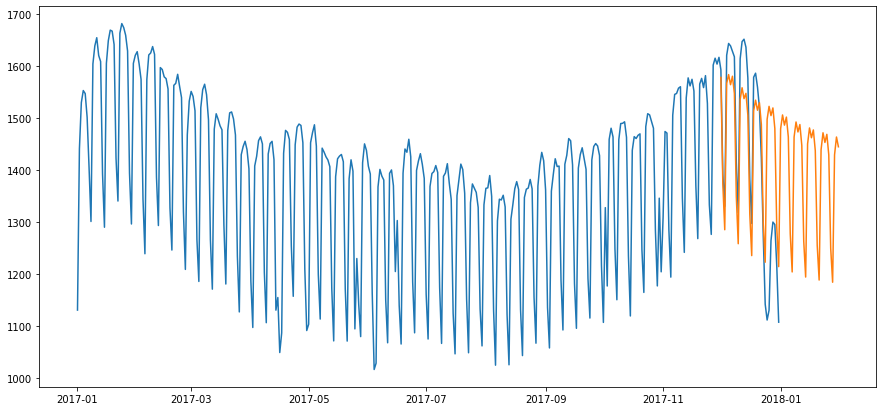

In [21]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(data.loc['2017','Consumption'])
ax.plot(predictions)